In [1]:
import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\shsubham\\program\\DATA\\hackerearth\\planecrash\\train.csv")

In [3]:
df.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [4]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [6]:
df.shape

(10000, 12)

In [7]:
df.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [8]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [9]:
df.dtypes

Severity                    object
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
Accident_ID                  int64
dtype: object

In [10]:
df['Severity'].value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [11]:
df['Severity'].value_counts(normalize=True)

Highly_Fatal_And_Damaging                  0.3049
Significant_Damage_And_Serious_Injuries    0.2729
Minor_Damage_And_Injuries                  0.2527
Significant_Damage_And_Fatalities          0.1695
Name: Severity, dtype: float64

In [12]:
df.nunique()


Severity                       4
Safety_Score                1175
Days_Since_Inspection         23
Total_Safety_Complaints       44
Control_Metric               952
Turbulence_In_gforces       1117
Cabin_Temperature            950
Accident_Type_Code             7
Max_Elevation               4191
Violations                     6
Adverse_Weather_Metric      4258
Accident_ID                10000
dtype: int64

In [13]:
df['Accident_Type_Code'].value_counts()

4    2057
2    1791
3    1752
7    1276
6    1215
1    1171
5     738
Name: Accident_Type_Code, dtype: int64

In [14]:
#for 
#    print(df.groupby('class').size())

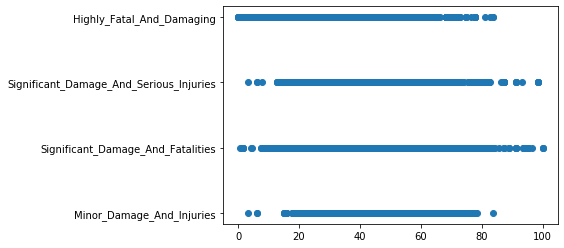

In [15]:
plt.scatter(df['Safety_Score'],df['Severity'])

In [16]:
#df.hist(figsize=(25,20))

Safety_Score                 AxesSubplot(0.125,0.821923;0.0596154x0.0580769)
Days_Since_Inspection      AxesSubplot(0.196538,0.821923;0.0596154x0.0580...
Total_Safety_Complaints    AxesSubplot(0.268077,0.821923;0.0596154x0.0580...
Control_Metric             AxesSubplot(0.339615,0.821923;0.0596154x0.0580...
Turbulence_In_gforces      AxesSubplot(0.411154,0.821923;0.0596154x0.0580...
Cabin_Temperature          AxesSubplot(0.482692,0.821923;0.0596154x0.0580...
Accident_Type_Code         AxesSubplot(0.554231,0.821923;0.0596154x0.0580...
Max_Elevation              AxesSubplot(0.625769,0.821923;0.0596154x0.0580...
Violations                 AxesSubplot(0.697308,0.821923;0.0596154x0.0580...
Adverse_Weather_Metric     AxesSubplot(0.768846,0.821923;0.0596154x0.0580...
Accident_ID                AxesSubplot(0.840385,0.821923;0.0596154x0.0580...
dtype: object

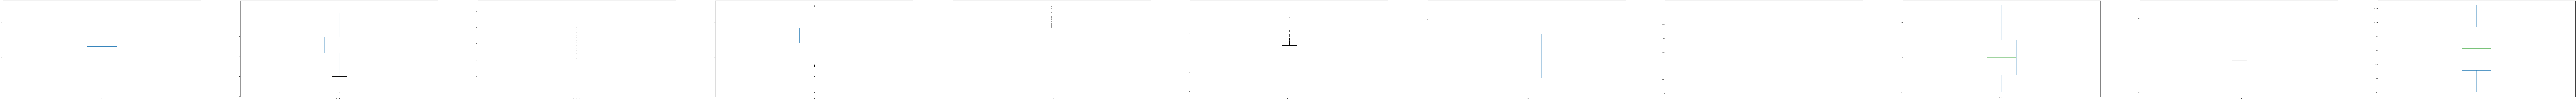

In [17]:
df.plot(kind='box', subplots=True, layout=(11,11), sharex=False, sharey=False, figsize=(512,256))

In [18]:
from pandas.plotting import scatter_matrix

In [19]:
#scatter_matrix(df,figsize=(50,40))

In [20]:
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le_Severity=LabelEncoder()
le_Severity.fit(df['Severity'])
df['Severity']=le_Severity.transform(df['Severity'])

In [23]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [25]:
df_1=df.set_index('Accident_ID')

In [26]:
df_1.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
7570,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [27]:
y=df_1['Severity']


In [28]:
y.head()

Accident_ID
7570     1
12128    1
2181     2
5946     3
9054     2
Name: Severity, dtype: int32

In [29]:
ind=np.arange(1,11).tolist()

In [30]:
X=df_1.iloc[:,ind]

In [31]:
X.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,
7570,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import warnings

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [35]:
warnings.filterwarnings("ignore",category=FutureWarning)

In [36]:
kfold=StratifiedKFold(n_splits=10,random_state=12,shuffle=True)

In [37]:
lr=LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
lr.coef_

array([[-1.32680224e-01, -4.31514540e-01, -8.38987014e-04,
         2.36242466e-02, -5.25064906e-04,  1.06100050e-01,
        -7.41052017e-02,  3.39898986e-06, -5.98483253e-03,
         1.17543874e-02],
       [ 5.34087330e-02,  1.27128286e-01,  6.27438349e-03,
        -1.10477493e-02, -8.55030232e-04, -5.02186664e-02,
        -1.03855292e-01,  1.48411267e-06, -1.06335747e-02,
         9.41548336e-03],
       [ 3.37741683e-02,  7.08818133e-02, -5.66001609e-03,
        -4.39643491e-02, -6.38377676e-04, -1.40265477e-02,
         5.79132814e-02, -1.02631816e-05,  1.53598091e-02,
         2.60732400e-03],
       [ 3.08228534e-03, -5.99605681e-03, -2.49981255e-03,
         2.44863279e-02, -2.05632412e-04, -3.58838667e-02,
         1.63325625e-02,  5.86955133e-06, -1.75915505e-03,
        -4.02320236e-03]])

In [39]:
X.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric'],
      dtype='object')

In [40]:
lr_predict=lr.predict(X_test)

In [41]:
f1_score(y_test,lr_predict,average='weighted')

0.4901946920935035

In [42]:
svc=SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
svc_predict=svc.predict(X_test)

In [44]:
f1_score(y_test,svc_predict,average='weighted')

0.23113457320760689

In [45]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
xgb_predict=xgb.predict(X_test)

In [47]:
f1_score(y_test,xgb_predict,average='weighted')

0.8210438470083455

In [48]:
def score(actual,predicted):
    return f1_score(actual,predicted,average='weighted')

In [49]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
#models.append(('xgboost',XGBClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    #print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #print(f'name:{name}   result_mean={cv_results.mean()}')
    print('{0}     {1:.2f}'.format(name,cv_results.mean()))

LR     0.55
KNN     0.41


In [50]:
def classification_model_evaluation(models,X_train,y_train,pcv=10,score='accuracy'):
    result={}
    for name,model in models:
        cv_result=cross_val_score(model,X_train,y_train,cv=pcv,scoring=score)
        result[name]=cv_result
        print('{0}     {1:.2f}'.format(name,cv_result.mean()))

In [51]:
classification_model_evaluation(models,X_train, y_train)

LR     0.55
KNN     0.42


In [52]:
print(models)

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'))]


In [53]:
name_lr,model_lr=models[0]

In [54]:
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
model_lr.coef_

array([[-1.32680224e-01, -4.31514540e-01, -8.38987014e-04,
         2.36242466e-02, -5.25064906e-04,  1.06100050e-01,
        -7.41052017e-02,  3.39898986e-06, -5.98483253e-03,
         1.17543874e-02],
       [ 5.34087330e-02,  1.27128286e-01,  6.27438349e-03,
        -1.10477493e-02, -8.55030232e-04, -5.02186664e-02,
        -1.03855292e-01,  1.48411267e-06, -1.06335747e-02,
         9.41548336e-03],
       [ 3.37741683e-02,  7.08818133e-02, -5.66001609e-03,
        -4.39643491e-02, -6.38377676e-04, -1.40265477e-02,
         5.79132814e-02, -1.02631816e-05,  1.53598091e-02,
         2.60732400e-03],
       [ 3.08228534e-03, -5.99605681e-03, -2.49981255e-03,
         2.44863279e-02, -2.05632412e-04, -3.58838667e-02,
         1.63325625e-02,  5.86955133e-06, -1.75915505e-03,
        -4.02320236e-03]])

In [56]:
lr_prob_result=model_lr.predict_proba(X_test)

In [57]:
model.fit(X_train,y_train)
xgb_cv_predict= model.predict(X_test)

In [58]:
from xgboost import plot_importance

In [59]:
#plot_importance(model)

In [60]:
xgb_cv_score=f1_score(y_test,xgb_cv_predict,average='weighted')

In [61]:
print(xgb_cv_score)

0.4063388575388


In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
{"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [64]:
parametres={}

In [65]:
df_result=pd.DataFrame({"original":y_test,"predicted":xgb_cv_predict})

In [66]:
df_result.count()

original     3000
predicted    3000
dtype: int64

In [67]:
df_pr=df_result.where(df_result['original']!=df_result['predicted'])

In [68]:
y_test

Accident_ID
8462     1
506      1
11246    3
9468     1
4718     1
        ..
4289     0
9056     3
4755     0
893      3
10234    1
Name: Severity, Length: 3000, dtype: int32

In [69]:
xgb_cv_predict

array([0, 0, 3, ..., 1, 3, 1])

In [70]:
pd.set_option('display.max_rows', 600)

In [71]:
pd.options.display.max_rows

600

In [72]:
df_pr.dropna(inplace=True)

In [73]:
xgb_prob=XGBClassifier()

In [74]:
xgb_prob.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [75]:
xgb_prob_result=xgb_prob.predict_proba(X_test)

In [76]:
xgb_prob_result

array([[0.2732887 , 0.5662568 , 0.10765138, 0.05280314],
       [0.17520063, 0.33037233, 0.2124709 , 0.2819561 ],
       [0.07115742, 0.13575566, 0.02409338, 0.76899356],
       ...,
       [0.27991635, 0.27944863, 0.02979683, 0.41083822],
       [0.11071845, 0.32492086, 0.38861492, 0.17574577],
       [0.02013729, 0.75466746, 0.04109542, 0.18409982]], dtype=float32)

In [77]:
pd.set_option('display.max_rows', 32000)

In [78]:
pd.options.display.max_rows

32000

In [79]:
#pd_df=pd.DataFrame(prob)

In [80]:
#print(pd_df)

In [81]:
df_result.reset_index()

,Accident_ID,original,predicted
0,8462,1,0
1,506,1,0
2,11246,3,3
3,9468,1,1
4,4718,1,1
5,2523,3,3
6,9643,0,0
7,11098,1,3
8,165,3,0
9,3918,1,2


In [82]:
lr_prob=lr.predict_proba(X_test)

In [83]:
lr_prob_df=pd.DataFrame(lr_prob)
lr_prob_df

,0,1,2,3
0,0.224903,0.315199,0.230114,0.229784
1,0.220254,0.245597,0.273682,0.260467
2,0.316410,0.186983,0.079409,0.417198
3,0.250469,0.270738,0.228314,0.250479
4,0.265170,0.298147,0.169630,0.267054
5,0.402926,0.221044,0.121565,0.254464
6,0.619496,0.077233,0.044545,0.258726
7,0.053610,0.375532,0.212970,0.357888
8,0.403282,0.195055,0.095044,0.306620
9,0.110721,0.386826,0.122458,0.379994


In [84]:
columns=df.columns

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
names.append(name)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.411282 (0.018186)


In [85]:
columns=df.columns

In [86]:
columns=[]
model_fs=XGBClassifier()
kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for i in X_train.columns:
    columns.append(i)
    X_Sel=X_train.loc[:,columns]
    cv_results=cross_val_score(model_fs,X_Sel,y_train,cv=kfold,scoring='accuracy')
    #print('mean: { 0}    std: {1}'.format(cv_results.mean(),cv_results.std()))
    print(' %f (%f)' % ( cv_results.mean(), cv_results.std()))


 0.454153 (0.018019)
 0.756427 (0.011928)
 0.757994 (0.012865)
 0.880293 (0.011684)
 0.877585 (0.011912)
 0.879009 (0.011489)
 0.838145 (0.006767)
 0.837146 (0.007743)
 0.835860 (0.006755)
 0.834008 (0.008755)


In [87]:
print(columns)

['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric']


In [88]:
new_col=['Safety_Score','Days_Since_Inspection','Control_Metric']
 
kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)

X_Sel=X_train.loc[:,new_col]
cv_results=cross_val_score(model_fs,X_Sel,y_train,cv=kfold,scoring='accuracy')
#print('mean: { 0}    std: {1}'.format(cv_results.mean(),cv_results.std()))
print(' %f (%f)' % ( cv_results.mean(), cv_results.std()))



 0.880295 (0.011576)


In [89]:
model_fs.fit(X_Sel,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [90]:
X_test_new=X_test.loc[:,new_col]
New_predict=model_fs.predict(X_test_new)

In [91]:
f1_score(y_test,New_predict,average='weighted')

0.8763384043969369

In [92]:
col=['Safety_Score','Days_Since_Inspection','Control_Metric']
X_feature_sel=X_train.loc[:,col]

In [93]:
print(X_feature_sel)

             Safety_Score  Days_Since_Inspection  Control_Metric
Accident_ID                                                     
10177           51.278539                     13       62.215132
6109            27.442922                     13       55.515041
778             58.858447                     14       83.135825
8421            22.922374                     22       80.993619
5199            34.657534                     11       57.520510
3547            51.643836                     10       72.561531
1760            48.995434                     10       56.927985
4520            42.557078                      9       68.185962
1111            60.547945                     10       73.473108
6184            76.666667                      6       74.339107
8423            30.913242                     16       56.836828
2375            26.392694                     13       52.324521
4943            32.602740                     12       67.456700
11881           57.442922

In [94]:
x=20
y=40
print('X={0} {1}'.format(x,y))

X=20 40


In [95]:
df_test=pd.read_csv("C:\\Users\\shsubham\\program\\DATA\\hackerearth\\planecrash\\test.csv")

In [96]:
df_test_sel=df_test.loc[:,new_col]
df_accid=df_test['Accident_ID']

In [97]:
df_test_sel.head()

,Safety_Score,Days_Since_Inspection,Control_Metric
0,19.497717,16,72.151322
1,58.173516,15,64.585232
2,33.287671,15,64.721969
3,3.287671,21,66.362808
4,10.867580,18,56.107566


In [98]:
df_test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [99]:
test_predict=model_fs.predict(df_test_sel)

In [100]:
result=pd.DataFrame({'Accident':df_accid,'Severity':test_predict})

In [101]:
result['Severity']=result['Severity'].replace([0,1,2,3],['Highly_Fatal_And_Damaging','Minor_Damage_And_Injuries','Significant_Damage_And_Fatalities','Significant_Damage_And_Serious_Injuries'])

In [102]:
print(result)

      Accident                                 Severity
0            1                Highly_Fatal_And_Damaging
1           10        Significant_Damage_And_Fatalities
2           14  Significant_Damage_And_Serious_Injuries
3           17                Highly_Fatal_And_Damaging
4           21                Highly_Fatal_And_Damaging
5           40        Significant_Damage_And_Fatalities
6           45        Significant_Damage_And_Fatalities
7           50                Highly_Fatal_And_Damaging
8           52                Highly_Fatal_And_Damaging
9           85  Significant_Damage_And_Serious_Injuries
10          95  Significant_Damage_And_Serious_Injuries
11         106  Significant_Damage_And_Serious_Injuries
12         111                Highly_Fatal_And_Damaging
13         123                Highly_Fatal_And_Damaging
14         129        Significant_Damage_And_Fatalities
15         130  Significant_Damage_And_Serious_Injuries
16         132                Highly_Fatal_And_D

In [103]:
le_Severity.classes_

array(['Highly_Fatal_And_Damaging', 'Minor_Damage_And_Injuries',
       'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries'], dtype=object)

In [104]:
test_predict_df=pd.DataFrame(test_predict)
result_final__1=test_predict_df.replace([0,1,2,3],['Highly_Fatal_And_Damaging','Minor_Damage_And_Injuries','Significant_Damage_And_Fatalities','Significant_Damage_And_Serious_Injuries'])

In [105]:
#result=pd.DataFrame({'Accident':df_accid,'Severity':result_final__1})

In [106]:
result.to_csv("airplane_accident_prediction1.csv")

In [107]:
#result_final.head()

In [108]:
final_prob=xgb_prob_result+lr_prob_result

In [109]:
print(final_prob)

[[0.49819219 0.8814555  0.33776497 0.28258736]
 [0.39545479 0.57596904 0.48615269 0.54242346]
 [0.38756789 0.32273914 0.1035019  1.18619108]
 ...
 [0.46821772 0.62986142 0.28643834 0.61548254]
 [0.2042222  0.62676218 0.49838494 0.67063069]
 [0.12937843 1.09036217 0.19247523 0.58778416]]


In [110]:
final_prob=final_prob/2

In [111]:
print(final_prob)

[[0.24909609 0.44072775 0.16888249 0.14129368]
 [0.19772739 0.28798452 0.24307634 0.27121173]
 [0.19378395 0.16136957 0.05175095 0.59309554]
 ...
 [0.23410886 0.31493071 0.14321917 0.30774127]
 [0.1021111  0.31338109 0.24919247 0.33531534]
 [0.06468922 0.54518108 0.09623761 0.29389208]]


In [112]:
type(final_prob)

numpy.ndarray

In [113]:
np.amax(final_prob,axis=1)

array([0.44072775, 0.28798452, 0.59309554, ..., 0.31493071, 0.33531534,
       0.54518108])

In [114]:
#final_prob_df=pd.DataFrame(final_prob)

In [115]:
index=np.where(final_prob==np.amax(final_prob))

In [116]:
final_predic=final_prob.argmax(axis=1)

In [117]:
fi_ens=f1_score(y_test,final_predic,average='weighted')

In [118]:
fi_ens

0.7949966509401234

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rfc=RandomForestClassifier(max_features=2,n_estimators=2)

In [121]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=2, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1893019789, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=2, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1755767531, splitter='best')]

In [124]:
X_Sel.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Control_Metric'], dtype='object')

In [125]:
#x_train.colu
rfc.feature_importances_

array([0.2460914 , 0.11442915, 0.0495493 , 0.13291995, 0.06862801,
       0.07360048, 0.0924391 , 0.05120909, 0.02920069, 0.14193281])

In [126]:
col=X_train.columns

In [127]:
for i in range(df.shape[1]):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11


In [128]:
rfc.feature_importances_

array([0.2460914 , 0.11442915, 0.0495493 , 0.13291995, 0.06862801,
       0.07360048, 0.0924391 , 0.05120909, 0.02920069, 0.14193281])

In [129]:
zipped=zip(rfc.feature_importances_,col)

In [130]:
for value in zipped:
    print(value)

(0.24609140122293446, 'Safety_Score')
(0.11442914901764417, 'Days_Since_Inspection')
(0.049549298596828086, 'Total_Safety_Complaints')
(0.13291995476879226, 'Control_Metric')
(0.06862801063492184, 'Turbulence_In_gforces')
(0.07360048339752512, 'Cabin_Temperature')
(0.09243910408338989, 'Accident_Type_Code')
(0.05120909254859559, 'Max_Elevation')
(0.029200691911828634, 'Violations')
(0.1419328138175401, 'Adverse_Weather_Metric')


In [131]:
(X_Sel.columns)

Index(['Safety_Score', 'Days_Since_Inspection', 'Control_Metric'], dtype='object')

In [132]:
import math

In [133]:
LR_Param={}
#depth_val=np.linspace(4,64,5,endpoint=True)
depth_val=[4,8,16,32]
#num_of_estmators=[10,20,30]
min_samples_leaf_val=[20,40,60,80,100]
max_features_val=[3,2,1]
#DecisionTree_param={'max_depth':depth,max_feature=max_feature_sel,min_sample_leaf=min_sample_leaf_val}
#np.arange is also available


In [134]:
def GridSearchRF(X_train,y_train):
    RandomForest_Param={'max_depth':depth_val,'min_samples_leaf':min_samples_leaf_val,'max_features':max_features_val}
    rfc=RandomForestClassifier()
    grid_search=GridSearchCV(estimator=rfc,param_grid=RandomForest_Param,cv=10)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    model=RandomForestClassifier(max_depth=grid_search.best_params_['max_depth'],max_features=grid_search.best_params_['max_features'],min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
    return model

In [135]:
#model=GridSearchRF(X_Sel,y_train)

{'max_depth': 16, 'max_features': 2, 'min_samples_leaf': 20}


In [136]:
#model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

tree based parameters: max_depth = 5,min_child_weight = 1,gamma = 0,subsample, colsample_bytree = 0.8,scale_pos_weight = 1
uning Regularization Parameters: reg_alpha

In [137]:
#learning_rate_val=[0.01,0.02,0.04,0.08,.1,.2,.4,.8] #default .3
learning_rate_val=[.1,.2]
subsample_val=[.5,.6,.8,1]
colsample_bytree_val=[.5,.7,.9,1]
n_estimators_val=[50,100,200]
#min_child_weight_val=[1,2,3,4]
#objective_val=['binary:logistic','multi:softmax','multi:softprob']

In [138]:
def GridSearchXGBC(X_train,y_train):
    XGB_classifier_param={'learning_rate':learning_rate_val,'subsample':subsample_val,'colsample_bytree':colsample_bytree_val}
    xgbc=XGBClassifier(objective='multi:softmax',booster='gbtree',n_estimators=100,silent=0,learning_rate=.3,min_child_weight=1,max_depth=6,gamma=0,max_delta_setp=0,colsample_bytree=1)
    gs=GridSearchCV(estimator=xgbc,param_grid=XGB_classifier_param,cv=10)
    gs.fit(X_train,y_train)
    print(gs.best_params_)
    model=XGBClassifier(objective='multi:softmax',booster='gbtree',n_estimators=100,silent=0,learning_rate=gs.best_params_['learning_rate'],subsample=gs.best_params_['subsample_val'] ,min_child_weight=1,max_depth=6,gamma=0,max_delta_setp=0,colsample_bytree=gs.best_params_['cosample_bytree'])

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

In [168]:
def GridSearchGBM_1(X_train,y_train,lr=.3,trees=50):
    default_learning_rate=.3
    default_num_of_tree=50
    base_GBM=GradientBoostingClassifier(learning_rate=lr,n_estimators=trees,max_depth=6,max_features='sqrt',min_samples_split=50,min_samples_leaf=10,subsample=1.0,n_iter_no_change=20,validation_fraction=.2)
    max_depth_val=[10,30,50,70,90,20]
    #max_depth_val=[10]
    min_samples_split_val=[4,8,16,32,64,128,256,512]
    #min_samples_split_val=[4]
    tol=1e-4
    parametres={'max_depth':max_depth_val,'min_samples_split':min_samples_split_val}
    grid_model=GridSearchCV(estimator=base_GBM,param_grid=parametres,cv=10)
    grid_model.fit(X_train,y_train)
    return grid_model

In [153]:
model1=GridSearchGBM(X_Sel,y_train)

In [156]:
model1.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=50,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=16,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=20, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.2, verbose=0,
                           warm_start=False)

In [159]:
model1.best_estimator_.feature_importances_

array([0.49832371, 0.33210039, 0.16957589])

In [163]:
n_fe=len(X_Sel.columns)
num_of_features=[n_fe//2,n_fe//3,round(math.sqrt(n_fe))]

In [164]:
num_of_features

[1, 1, 2]

In [169]:
def GridSearchGBM(X_train,y_train,lr=.3,trees=50):
    default_learning_rate=.3
    default_num_of_tree=50
    base_GBM=GradientBoostingClassifier(learning_rate=lr,n_estimators=trees,max_depth=6,max_features='sqrt',min_samples_split=50,min_samples_leaf=10,subsample=1.0,n_iter_no_change=20,validation_fraction=.2)
    max_depth_val=[10,30,50,70,90,20]
    #max_depth_val=[10]
    min_samples_split_val=[4,8,16,32,64,128,256,512]
    #min_samples_split_val=[4]
    n_fe=len(X_Sel.columns)
    max_features_val=[n_fe//2,n_fe//3,round(math.sqrt(n_fe)),n_fe]
    tol=1e-4
    first_tuning={'max_depth':max_depth_val,'min_samples_split':min_samples_split_val,'max_features':max_features_val}
    grid_model=GridSearchCV(estimator=base_GBM,param_grid=first_tuning,cv=10)
    grid_model.fit(X_train,y_train)
    #learning-rate=2-10/num of trees
    #learning_rate_val=[.2,.1,.05,.02,.01]
    learning_rate_val=[.2,.1]
    #n_estimators_val=[50,100,200,400,500,800,1000]
    n_estimators_val=[100,200]
    second_tuning={'learning_rate':learning_rate_val,'n_estimators':n_estimators_val}
    final_model=GridSearchCV(estimator=grid_model.best_estimator_,param_grid=second_tuning,cv=10)
    return final_model

In [170]:
model2=GridSearchGBM(X_Sel,y_train)

In [ ]:
model2.